<center> <h1> <b> Investigating the Impact of Income-Related Factors on COVID-19 Death Rate Across Countries and the Moderating Effect of the Overall Prevention Policy Strength on This Relationship </b> </h1> </center>

<h2> Introduction </h2>

COVID-19 has a huge impact around the world, and countries with weaker economies are always more fragile to the spread of such outbreak. This paper examines the relationship between income-related factors, such as average wages, informal employment rate, and the Gini coefficient, and the number of COVID-19 diagnoses in each country to demonstrate their contribution to the spread of virus. Moreover, this research also examines the role of government efforts to combat the epidemic (including school closures, mask policies, and home office policies ect.) in mediating this relationship to test the effectiveness of government interventions. 

<h2> Data Cleaning and Loading </h2>

In [38]:
#Load the first dataset, including countries and their accumulated COVID-19 confirmed case
import pandas as pd
file_path = r"C:\Users\chenr\OneDrive\ECO225Project\Data\variables\time_series_covid19_confirmed_global.csv"
confirmed_data = pd.read_csv(file_path)
confirmed_data = confirmed_data.drop(columns=['Province/State', 'Long', 'Lat'], errors='ignore')
confirmed_data.columns = [col if col == "Country/Region" else pd.to_datetime(col, errors='coerce').date() for col in confirmed_data.columns]
date_columns = confirmed_data.columns[1:]  
first_of_each_month = [col for col in date_columns if col.day == 1]
last_date = pd.to_datetime("12/1/2022").date()
first_of_each_month = [col for col in first_of_each_month if col <= last_date]
if last_date not in first_of_each_month:
    first_of_each_month.append(last_date)
columns_to_keep = ["Country/Region"] + first_of_each_month
confirmed_data_filtered = confirmed_data[columns_to_keep]
confirmed_data_filtered.rename(columns={'Country/Region': 'Country Name'}, inplace=True)
print(confirmed_data_filtered)

             Country Name  2020-02-01  2020-03-01  2020-04-01  2020-05-01  \
0             Afghanistan           0           5         192        2171   
1                 Albania           0           0         259         782   
2                 Algeria           0           1         847        4154   
3                 Andorra           0           0         390         745   
4                  Angola           0           0           8          30   
..                    ...         ...         ...         ...         ...   
284    West Bank and Gaza           0           0         134         353   
285  Winter Olympics 2022           0           0           0           0   
286                 Yemen           0           0           0           7   
287                Zambia           0           0          36         109   
288              Zimbabwe           0           0           8          40   

     2020-06-01  2020-07-01  2020-08-01  2020-09-01  2020-10-01  ...  \
0  

C:\Users\chenr\AppData\Local\Temp\ipykernel_14992\1066689124.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  confirmed_data_filtered.rename(columns={'Country/Region': 'Country Name'}, inplace=True)


In [37]:
#load Death data
file_path = r"C:\Users\chenr\OneDrive\ECO225Project\Data\variables\time_series_covid19_deaths_global.csv"
Death_data = pd.read_csv(file_path)
Death_data = Death_data.drop(columns=['Province/State', 'Long', 'Lat'], errors='ignore')
Death_data.columns = [col if col == "Country/Region" else pd.to_datetime(col, errors='coerce').date() for col in Death_data.columns]
date_columns = Death_data.columns[1:]  
first_of_each_month = [col for col in date_columns if col.day == 1]
last_date = pd.to_datetime("12/1/2022").date()
first_of_each_month = [col for col in first_of_each_month if col <= last_date]
if last_date not in first_of_each_month:
    first_of_each_month.append(last_date)
columns_to_keep = ["Country/Region"] + first_of_each_month
Death_data_filtered = Death_data[columns_to_keep]
Death_data_filtered.rename(columns={'Country/Region': 'Country Name'}, inplace=True)
print(Death_data_filtered)

             Country Name  2020-02-01  2020-03-01  2020-04-01  2020-05-01  \
0             Afghanistan           0           0           4          64   
1                 Albania           0           0          15          31   
2                 Algeria           0           0          58         453   
3                 Andorra           0           0          14          43   
4                  Angola           0           0           2           2   
..                    ...         ...         ...         ...         ...   
284    West Bank and Gaza           0           0           1           2   
285  Winter Olympics 2022           0           0           0           0   
286                 Yemen           0           0           0           2   
287                Zambia           0           0           0           3   
288              Zimbabwe           0           0           1           4   

     2020-06-01  2020-07-01  2020-08-01  2020-09-01  2020-10-01  ...  \
0  

C:\Users\chenr\AppData\Local\Temp\ipykernel_14992\2435667583.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Death_data_filtered.rename(columns={'Country/Region': 'Country Name'}, inplace=True)


In [40]:
#calculate Case Fatality Rate (CRF)
cfr_df = Death_data_filtered.copy()
cfr_df.iloc[:, 1:] = (Death_data_filtered.iloc[:, 1:] / confirmed_data_filtered.iloc[:, 1:]) * 100  # 转换为百分比

cfr_df.iloc[:, 1:] = cfr_df.iloc[:, 1:].fillna(0).replace([float('inf'), -float('inf')], 0)
print(confirmed_data_filtered['Country Name'].equals(Death_data_filtered['Country Name']))

print(cfr_df)

True
             Country Name  2020-02-01  2020-03-01  2020-04-01  2020-05-01  \
0             Afghanistan         0.0         0.0    2.083333    2.947950   
1                 Albania         0.0         0.0    5.791506    3.964194   
2                 Algeria         0.0         0.0    6.847698   10.905152   
3                 Andorra         0.0         0.0    3.589744    5.771812   
4                  Angola         0.0         0.0   25.000000    6.666667   
..                    ...         ...         ...         ...         ...   
284    West Bank and Gaza         0.0         0.0    0.746269    0.566572   
285  Winter Olympics 2022         0.0         0.0    0.000000    0.000000   
286                 Yemen         0.0         0.0    0.000000   28.571429   
287                Zambia         0.0         0.0    0.000000    2.752294   
288              Zimbabwe         0.0         0.0   12.500000   10.000000   

     2020-06-01  2020-07-01  2020-08-01  2020-09-01  2020-10-01  ...  

In [9]:
#Load the 2nd dataset, including countries and their informal employment rate
file_path = r"C:\Users\chenr\OneDrive\ECO225Project\Data\variables\SDG_0831_SEX_ECO_RT_A-20250201T1718.csv"
Inefficient_Employment = pd.read_csv(file_path)
columns_to_keep = ['ref_area.label', 'time', 'obs_value'] 
Inefficient_Employment = Inefficient_Employment[columns_to_keep]
pivot_Inefficient_Employment = Inefficient_Employment.pivot(index='ref_area.label', columns='time', values='obs_value')
pivot_Inefficient_Employment.reset_index(inplace=True)
pivot_Inefficient_Employment = pivot_Inefficient_Employment.drop(columns=[2019])
pivot_Inefficient_Employment.columns = pivot_Inefficient_Employment.columns.astype(str)
pivot_Inefficient_Employment = pivot_Inefficient_Employment.dropna(how='all', subset=['2020', '2021', '2022'])
pivot_Inefficient_Employment = pivot_Inefficient_Employment.bfill(axis=1).ffill(axis=1)
pivot_Inefficient_Employment.rename(columns={'ref_area.label': 'Country Name'}, inplace=True)
print(pivot_Inefficient_Employment)

time Country Name    2020    2021    2022
0     Afghanistan  86.395  86.395  86.395
1          Angola  90.254  90.254  92.189
2       Argentina  46.981  49.142  51.196
3       Australia  25.476  26.105  26.105
4         Austria   1.978   1.548   1.381
..            ...     ...     ...     ...
108        Uganda  95.197  95.197  95.197
109       Uruguay  21.615  21.444  22.137
111      Viet Nam  69.238  70.391  68.567
113        Zambia  84.763  85.990  85.560
114      Zimbabwe  88.439  88.439  88.306

[98 rows x 4 columns]


C:\Users\chenr\AppData\Local\Temp\ipykernel_14992\3647020162.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pivot_Inefficient_Employment = pivot_Inefficient_Employment.bfill(axis=1).ffill(axis=1)


In [10]:
#Load the 3rd dataset, including the stringent index
file_path = r"C:\Users\chenr\OneDrive\ECO225Project\Data\variables\OXFORD-CGRT.xlsx"
stringent = pd.read_excel(file_path)
stringent_id = stringent[stringent["Indicator ID"] == "OXFORD.CGRT.stringency_index"]
stringent = stringent_id.drop(columns=['Economy ISO3', 'Indicator ID', 'Indicator’， ‘Attribute 1', 'Attribute 2', 'Attribute 3', 'Partner'], errors='ignore')
stringent.columns = [col if col == "Economy Name" else pd.to_datetime(col, errors='coerce').date() for col in stringent.columns]
date_columns = stringent.columns[1:]  
columns_to_keep = ["Economy Name"] + first_of_each_month
stringent_filtered = stringent[columns_to_keep]
stringent_filtered.rename(columns={'Economy Name': 'Country Name'}, inplace=True)
print(stringent_filtered)

      Country Name  2020-02-01  2020-03-01  2020-04-01  2020-05-01  \
21           Aruba        0.00        0.00       85.19       85.19   
43     Afghanistan        0.00       27.78       67.59       84.26   
65          Angola        0.00        8.33       90.74       78.70   
87         Albania        0.00        8.33       84.26       89.81   
109        Andorra        0.00        0.00       53.70       52.78   
...            ...         ...         ...         ...         ...   
4005        Kosovo        0.00        0.00       92.59       92.59   
4027   Yemen, Rep.        0.00        0.00       53.70       64.81   
4049  South Africa        2.78        2.78       87.96       84.26   
4071        Zambia        0.00       16.67       47.22       65.28   
4093      Zimbabwe        8.33        8.33       87.96       87.96   

      2020-06-01  2020-07-01  2020-08-01  2020-09-01  2020-10-01  ...  \
21         57.41       47.22       47.22       73.15       58.33  ...   
43         84

C:\Users\chenr\AppData\Local\Temp\ipykernel_14992\1229748167.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stringent_filtered.rename(columns={'Economy Name': 'Country Name'}, inplace=True)


In [11]:
#Load the 4th dataset, including the unemployment rate of each country 
file_path = r"C:\Users\chenr\OneDrive\ECO225Project\Data\variables\API_SL.UEM.TOTL.NE.ZS_DS2_en_csv_v2_3129.csv"
unemployment = pd.read_csv(file_path, skiprows=4)
unemployment_keep = ['Country Name', '2020', '2021', '2022'] 
unemployment_filtered = unemployment[unemployment_keep]
unemployment_filtered_cleaned = unemployment_filtered[unemployment_filtered.iloc[:, 1:].notna().any(axis=1)]
unemployment_filtered_cleaned_filled = unemployment_filtered_cleaned.bfill(axis=1).ffill(axis=1)
print(unemployment_filtered_cleaned_filled)

                   Country Name      2020      2021      2022
2                   Afghanistan  11.71000   5.67900   5.67900
3    Africa Western and Central   3.16432   3.16432   3.16432
4                        Angola  15.79900  15.79900  14.12400
5                       Albania  11.63900  11.47400  10.78500
8          United Arab Emirates   4.29400   3.10500   2.87300
..                          ...       ...       ...       ...
260                       Samoa   5.04800   5.04800   5.04800
261                      Kosovo  25.45900  20.39200  12.09300
263                South Africa  29.21700  34.00700  33.26800
264                      Zambia   6.03200   5.19700   5.99300
265                    Zimbabwe   9.54000   9.54000  10.08700

[186 rows x 4 columns]


C:\Users\chenr\AppData\Local\Temp\ipykernel_14992\3353012823.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  unemployment_filtered_cleaned_filled = unemployment_filtered_cleaned.bfill(axis=1).ffill(axis=1)


In [12]:
#Load the 5th dataset, including the average wage of each country
file_path = r"C:\Users\chenr\OneDrive\ECO225Project\Data\variables\EAR_4MTH_SEX_CUR_NB_A-20250202T1501.csv"
avg_wage = pd.read_csv(file_path)
avg_wage_cur = avg_wage[avg_wage["classif1.label"] == "Currency: U.S. dollars"]
avg_wage_keep = ['ref_area.label', 'time', 'obs_value'] 
avg_wage_filtered = avg_wage_cur[avg_wage_keep]
pivot_avg_wage_filtered = avg_wage_filtered.pivot(index='ref_area.label', columns='time', values='obs_value')
pivot_avg_wage_filtered.reset_index(inplace=True)
pivot_avg_wage_filtered = pivot_avg_wage_filtered.drop(columns=[2019])
pivot_avg_wage_filtered.columns = pivot_avg_wage_filtered.columns.astype(str)
pivot_avg_wage_filtered = pivot_avg_wage_filtered.dropna(how='all', subset=['2020', '2021', '2022'])
pivot_avg_wage_filtered = pivot_avg_wage_filtered.bfill(axis=1).ffill(axis=1)
pivot_avg_wage_filtered.rename(columns={'ref_area.label': 'Country Name'}, inplace=True)
print(pivot_avg_wage_filtered)

time Country Name     2020     2021     2022
0     Afghanistan  171.874  171.874  171.874
1         Albania  493.898  552.463  547.568
2          Angola  143.606  143.606  143.606
3       Argentina  514.353  544.819  635.912
4         Armenia  257.120  259.164  259.164
..            ...      ...      ...      ...
125       Uruguay  879.980  879.980  879.980
126    Uzbekistan  265.886  303.014  351.322
127      Viet Nam  296.184  291.293  320.607
128        Zambia  163.247  160.128  203.415
129      Zimbabwe  157.365  157.365   80.864

[116 rows x 4 columns]


C:\Users\chenr\AppData\Local\Temp\ipykernel_14992\3266333302.py:12: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pivot_avg_wage_filtered = pivot_avg_wage_filtered.bfill(axis=1).ffill(axis=1)


In [13]:
#Load the 6th dataset, including the gini coefficient of each country
file_path = r"C:\Users\chenr\OneDrive\ECO225Project\Data\variables\API_SI.POV.GINI_DS2_en_csv_v2_53.csv"
gini = pd.read_csv(file_path, skiprows=4)
gini_keep = ['Country Name', '2020', '2021', '2022'] 
gini_filtered = gini[gini_keep]
gini_filtered_cleaned = gini_filtered[gini_filtered.iloc[:, 1:].notna().any(axis=1)]
gini_filtered_cleaned_filled = gini_filtered_cleaned.bfill(axis=1).ffill(axis=1)
print(gini_filtered_cleaned_filled)

      Country Name  2020  2021  2022
5          Albania  29.4  29.4  29.4
9        Argentina  42.7  42.4  40.7
10         Armenia  25.1  27.9  27.9
14         Austria  29.8  30.7  30.7
16         Burundi  37.5  37.5  37.5
..             ...   ...   ...   ...
250        Uruguay  40.2  40.8  40.6
251  United States  39.7  39.7  41.3
252     Uzbekistan  31.2  31.2  31.2
257       Viet Nam  36.8  36.1  36.1
264         Zambia  51.5  51.5  51.5

[92 rows x 4 columns]


C:\Users\chenr\AppData\Local\Temp\ipykernel_14992\3844149613.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  gini_filtered_cleaned_filled = gini_filtered_cleaned.bfill(axis=1).ffill(axis=1)


In [14]:
#Load the 7th dataset, including the population of each country
file_path = r"C:\Users\chenr\OneDrive\ECO225Project\Data\variables\API_SP.POP.TOTL_DS2_en_csv_v2_87.csv"
population = pd.read_csv(file_path, skiprows=4)
population_keep = ['Country Name', '2020', '2021', '2022'] 
population_filtered = population[population_keep]
population_filtered_cleaned = population_filtered[population_filtered.iloc[:, 1:].notna().any(axis=1)]
population_filtered_cleaned_filled = population_filtered_cleaned.bfill(axis=1).ffill(axis=1)
print(population_filtered_cleaned_filled)

                    Country Name         2020         2021         2022
0                          Aruba     108587.0     107700.0     107310.0
1    Africa Eastern and Southern  694446100.0  713090928.0  731821393.0
2                    Afghanistan   39068979.0   40000412.0   40578842.0
3     Africa Western and Central  474569351.0  485920997.0  497387180.0
4                         Angola   33451132.0   34532429.0   35635029.0
..                           ...          ...          ...          ...
261                       Kosovo    1790152.0    1786080.0    1768096.0
262                  Yemen, Rep.   36134863.0   37140230.0   38222876.0
263                 South Africa   60562381.0   61502603.0   62378410.0
264                       Zambia   19059395.0   19603607.0   20152938.0
265                     Zimbabwe   15526888.0   15797210.0   16069056.0

[265 rows x 4 columns]


C:\Users\chenr\AppData\Local\Temp\ipykernel_14992\719470628.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  population_filtered_cleaned_filled = population_filtered_cleaned.bfill(axis=1).ffill(axis=1)


In [73]:
#Load government spending
file_path = r"C:\Users\chenr\OneDrive\ECO225Project\Data\variables\gvmt_heath_spending.xlsx"
gvmt_spending = pd.read_excel(file_path)
gvmt_spending.columns = gvmt_spending.columns.astype(str)
print(gvmt_spending)

       Country Name       2020       2021       2022
0         Australia   4093.631   4587.565   4602.889
1           Austria   4504.759   5241.151   5663.700
2           Belgium   4292.961   4674.031   5057.595
3            Canada   4332.676   4577.510   4506.145
4             Chile   1571.871   1679.242   1679.256
5          Colombia   1001.512   1200.977   1247.765
6        Costa Rica   1226.253   1244.093   1233.567
7           Czechia   3336.273   3718.546   3872.158
8           Denmark   4828.686   5429.407   5324.070
9           Estonia   2105.704   2343.295   2356.065
10          Finland   3648.239   4189.524   4476.218
11           France   4624.228   5177.946   5622.288
12          Germany   5910.842   6424.421   6929.641
13           Greece   1537.205   1699.982   1785.425
14          Hungary   1714.458   1991.498   2054.945
15          Iceland   3859.854   4272.537   4425.111
16          Ireland   4196.834   4536.042   4677.630
17           Israel   1960.761   2221.245   23

<h2> Summary Statistics Tables </h2>

In [72]:
Inefficient_melted = pd.melt(pivot_Inefficient_Employment, id_vars=['Country Name'], var_name='year', value_name='Inefficient Employment')
Unemployment_melted = pd.melt(unemployment_filtered_cleaned_filled, id_vars=['Country Name'], var_name='year', value_name='Unemployment Rate')
Avg_wage_melted = pd.melt(pivot_avg_wage_filtered, id_vars=['Country Name'], var_name='year', value_name='Average Monthly wage')
Gini_melted = pd.melt(gini_filtered_cleaned_filled, id_vars=['Country Name'], var_name='year', value_name='Gini Index')
Population_melted = pd.melt(population_filtered_cleaned_filled, id_vars=['Country Name'], var_name='year', value_name='Population')
Health_spend_melted = pd.melt(gvmt_spending, id_vars=['Country Name'], var_name='year', value_name='Government Health Spending')

tables = [Avg_wage_melted, Inefficient_melted, Unemployment_melted, Gini_melted, Population_melted, Health_spend_melted]
from functools import reduce
year_table = reduce(lambda left, right: left.merge(right, on=['Country Name', 'year'], how='inner'), tables)
print(year_table)

unique_countries = year_table['Country Name'].unique()

    Country Name  year  Average Monthly wage  Inefficient Employment  \
0      Argentina  2020               514.353                  46.981   
1        Austria  2020              4753.406                   1.978   
2        Belgium  2020              5760.266                   1.262   
3         Brazil  2020               477.027                  36.730   
4       Bulgaria  2020               855.426                   2.726   
..           ...   ...                   ...                     ...   
97      Portugal  2022              1092.995                   4.585   
98      Slovenia  2022              2773.226                   0.995   
99         Spain  2022              2852.492                   2.612   
100       Sweden  2022              4475.317                   3.266   
101  Switzerland  2022              6463.190                   0.883   

     Unemployment Rate  Gini Index   Population  Government Health Spending  
0               11.461        42.7   45191965.0          

In [77]:
cfr_df = cfr_df[confirmed_data_filtered['Country Name'].isin(unique_countries)]
CRF_melted = pd.melt(cfr_df, id_vars=['Country Name'], var_name='date', value_name='CRF')
stringent_filtered = stringent_filtered[stringent_filtered['Country Name'].isin(unique_countries)]
Stringent_melted = pd.melt(stringent_filtered, id_vars=['Country Name'], var_name='date', value_name='Stringent Index')

date_table = CRF_melted.merge(Stringent_melted, on=['Country Name', 'date'], how='inner')
print(date_table)

unique_countries1 = date_table['Country Name'].unique()
print(unique_countries1)

     Country Name        date       CRF  Stringent Index
0       Argentina  2020-02-01  0.000000            11.11
1         Austria  2020-02-01  0.000000             0.00
2         Belgium  2020-02-01  0.000000            11.11
3          Brazil  2020-02-01  0.000000             5.56
4        Bulgaria  2020-02-01  0.000000             0.00
...           ...         ...       ...              ...
1710     Portugal  2022-12-01  0.459199            11.11
1711     Slovenia  2022-12-01  0.550445            11.11
1712        Spain  2022-12-01  0.852495            11.11
1713       Sweden  2022-12-01  0.802670            11.11
1714  Switzerland  2022-12-01  0.325889             5.56

[1715 rows x 4 columns]
['Argentina' 'Austria' 'Belgium' 'Brazil' 'Bulgaria' 'Chile' 'Colombia'
 'Costa Rica' 'Croatia' 'Cyprus' 'Czechia' 'Estonia' 'Finland' 'France'
 'Germany' 'Greece' 'Hungary' 'India' 'Indonesia' 'Ireland' 'Italy'
 'Latvia' 'Lithuania' 'Luxembourg' 'Malta' 'Mexico' 'Netherlands' 'Peru'
 'Pola

C:\Users\chenr\AppData\Local\Temp\ipykernel_14992\281913587.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cfr_df = cfr_df[confirmed_data_filtered['Country Name'].isin(unique_countries)]


In [74]:
date_table['year'] = pd.to_datetime(date_table['date']).dt.year
date_table['year'] = date_table['year'].astype(int)
year_table['year'] = year_table['year'].astype(int)
merged_data = date_table.merge(year_table, on=['Country Name', 'year'], how='inner')
merged_data.drop(columns=['year'], inplace=True)

print(merged_data)

ellipsis_row = pd.DataFrame([["..."] * merged_data.shape[1]], columns=merged_data.columns)
subset_data = pd.concat([merged_data.head(7), ellipsis_row, merged_data.tail(6)], ignore_index=True)
styled_table = subset_data.style.set_properties(**{
    'border': '1px solid black',
    'padding': '5px',
    'text-align': 'center'
}).set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#f2f2f2'), ('font-weight', 'bold')]}
])

display(styled_table)

     Country Name        date       CRF  Stringent Index  \
0       Argentina  2020-02-01  0.000000            11.11   
1         Austria  2020-02-01  0.000000             0.00   
2         Belgium  2020-02-01  0.000000            11.11   
3          Brazil  2020-02-01  0.000000             5.56   
4        Bulgaria  2020-02-01  0.000000             0.00   
...           ...         ...       ...              ...   
1710     Portugal  2022-12-01  0.459199            11.11   
1711     Slovenia  2022-12-01  0.550445            11.11   
1712        Spain  2022-12-01  0.852495            11.11   
1713       Sweden  2022-12-01  0.802670            11.11   
1714  Switzerland  2022-12-01  0.325889             5.56   

      Average Monthly wage  Inefficient Employment  Unemployment Rate  \
0                  514.353                  46.981             11.461   
1                 4753.406                   1.978              5.201   
2                 5760.266                   1.262          

,Country Name,date,CRF,Stringent Index,Average Monthly wage,Inefficient Employment,Unemployment Rate,Gini Index,Population,Government Health Spending
0,Argentina,2020-02-01,0.000000,11.110000,514.353000,46.981000,11.461000,42.700000,45191965.000000,1443.829000
1,Austria,2020-02-01,0.000000,0.000000,4753.406000,1.978000,5.201000,29.800000,8916864.000000,4504.759000
2,Belgium,2020-02-01,0.000000,11.110000,5760.266000,1.262000,5.545000,26.000000,11538604.000000,4292.961000
3,Brazil,2020-02-01,0.000000,5.560000,477.027000,36.730000,13.697000,48.900000,208660842.000000,705.140000
4,Bulgaria,2020-02-01,0.000000,0.000000,855.426000,2.726000,5.125000,40.500000,6934015.000000,1339.922000
5,Chile,2020-02-01,0.000000,0.000000,928.035000,25.830000,10.934000,47.000000,19370624.000000,1571.871000
6,Colombia,2020-02-01,0.000000,8.330000,337.566000,63.242000,15.983000,53.500000,50629997.000000,1001.512000
7,...,...,...,...,...,...,...,...,...,...
8,Poland,2022-12-01,1.862462,9.260000,1347.444000,9.778000,2.811000,28.500000,36821749.000000,2226.635000
9,Portugal,2022-12-01,0.459199,11.110000,1092.995000,4.585000,6.011000,34.600000,10434332.000000,2640.476000


<h2> Visualizations </h2>

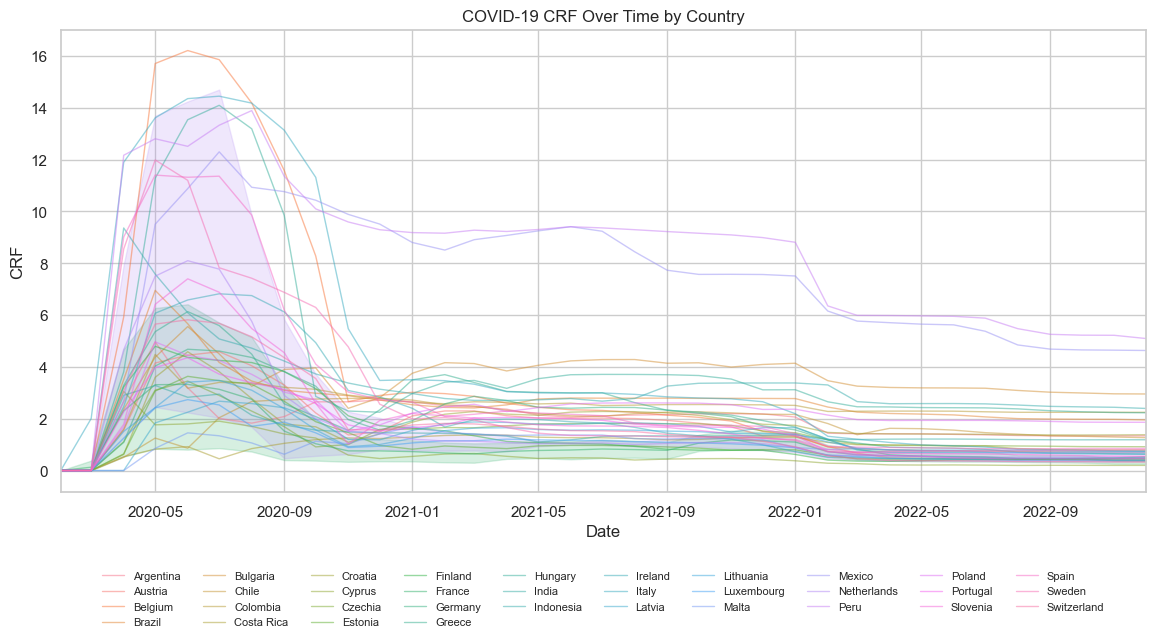

In [76]:
#the change of Confirmed by Date for each country
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))

sns.lineplot(data=merged_data, x="date", y="CRF", hue="Country Name", alpha=0.5, linewidth=1)

plt.xlim(merged_data["date"].min(), pd.to_datetime("2022-12-01"))
plt.title("COVID-19 CRF Over Time by Country")
plt.xlabel("Date")
plt.ylabel("CRF")
plt.legend(
    loc="upper center",         
    bbox_to_anchor=(0.5, -0.15),  
    ncol=10,                    
    fontsize=8,                  
    frameon=False                
) 

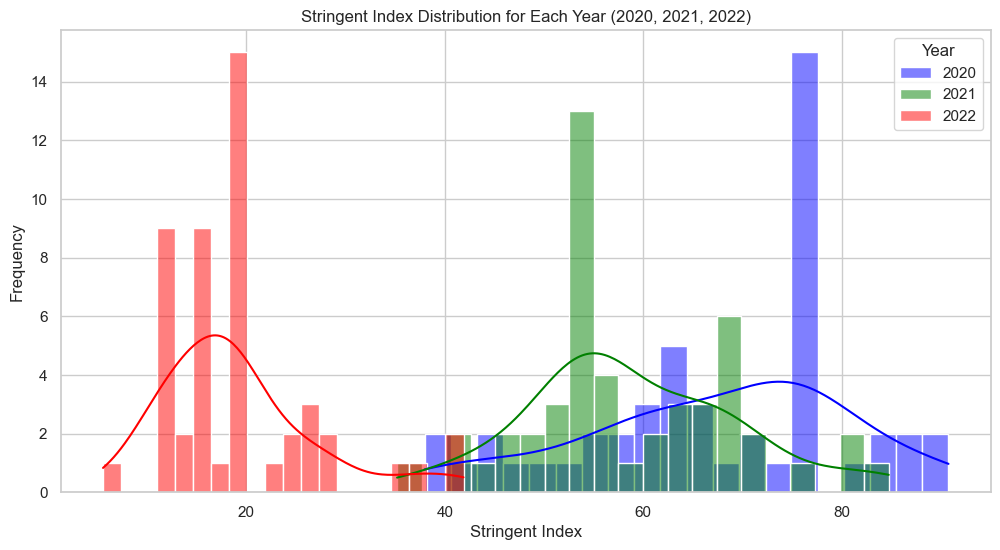

In [79]:
#Stringent Index Distribution for each year
merged_data["date"] = pd.to_datetime(merged_data["date"], errors='coerce')
filtered_data = merged_data[merged_data["date"].dt.strftime('%m-%d') == "06-01"]

plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

years = [2020, 2021, 2022]
colors = ['blue', 'green', 'red']

for year, color in zip(years, colors):
    yearly_data = filtered_data[filtered_data["date"].dt.year == year]["Stringent Index"]
    sns.histplot(yearly_data, kde=True, bins=20, color=color, label=str(year), alpha=0.5)

plt.title("Stringent Index Distribution for Each Year (2020, 2021, 2022)")
plt.xlabel("Stringent Index")
plt.ylabel("Frequency")

plt.legend(title="Year")

Text(0, 0.5, 'Gini Index')

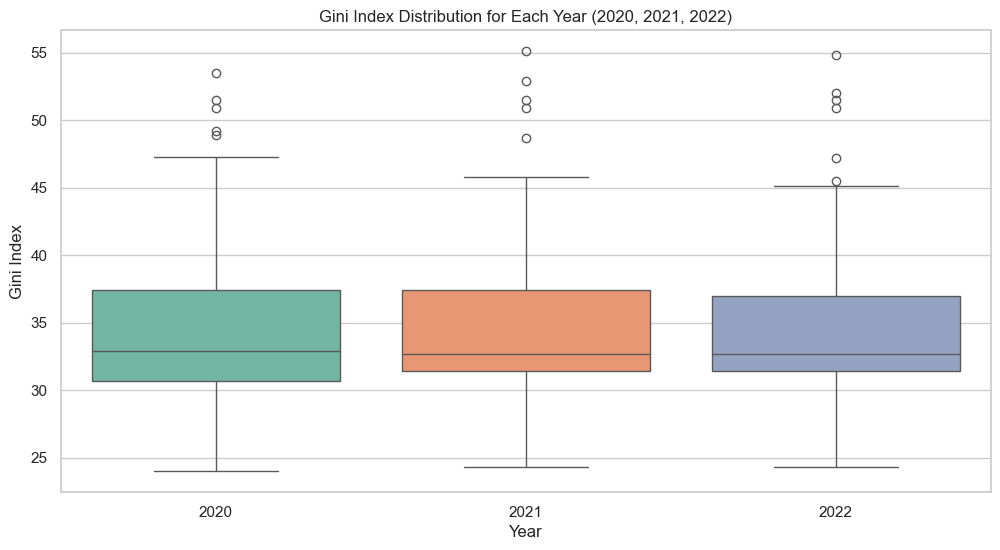

In [78]:
#Gini Index Distribution for Each Year
filtered_data.loc[:, "Year"] = filtered_data["date"].dt.year

plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

sns.boxplot(x="Year", y="Gini Index", data=filtered_data, hue="Year", palette="Set2", legend=False)

plt.title("Gini Index Distribution for Each Year (2020, 2021, 2022)")
plt.xlabel("Year")
plt.ylabel("Gini Index")

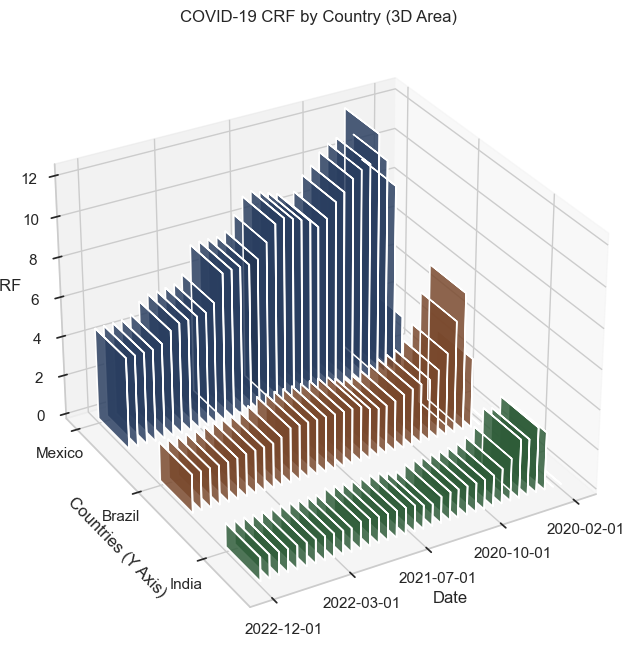

In [51]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

countries = ["Mexico", "Brazil", "India"]
fig = plt.figure(figsize=(14, 8))

ax = fig.add_subplot(111, projection='3d')

for idx, country in enumerate(countries):
    country_data = merged_data[merged_data["Country Name"] == country]
    
    date_nums = (country_data["date"] - country_data["date"].min()) / np.timedelta64(1, 'D')  # 转换为天数
    
    X = date_nums
    Y = np.full_like(X, idx)  
    Z = country_data["CRF"]
    
    ax.bar3d(X, Y, np.zeros_like(Z), 1, 0.5, Z, alpha=0.6, label=country)

ax.set_title("COVID-19 CRF by Country (3D Area)")
ax.set_xlabel("Date")
ax.set_ylabel("Countries (Y Axis)")
ax.set_zlabel("CRF")

ax.set_yticks([0, 1, 2])
ax.set_yticklabels(countries)

date_labels = pd.to_datetime(country_data["date"]).dt.date  
ax.set_xticks(np.linspace(0, date_nums.max(), num=5))  
ax.set_xticklabels(date_labels.iloc[np.linspace(0, len(date_labels)-1, num=5).astype(int)])  

ax.view_init(elev=30, azim=60)  

plt.show()
